In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv("/Users/luckybozi/Downloads/House Price Prediction Dataset.csv")

In [26]:
type(df)

pandas.core.frame.DataFrame

In [28]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [30]:
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [32]:
# what is the oldest house and the newest in dataset

# Sort the DataFrame by 'YearBuilt' in ascending order
df_sorted_by_year = df.sort_values(by='YearBuilt', ascending=True)

# Display the sorted DataFrame
df_sorted_by_year


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
24,25,689,5,1,3,1900,Urban,Excellent,Yes,688668
576,577,1960,1,3,2,1900,Downtown,Excellent,Yes,756168
1927,1928,2049,4,1,1,1900,Rural,Fair,No,193092
754,755,2719,3,2,3,1900,Urban,Good,Yes,92103
1944,1945,2942,4,2,2,1900,Suburban,Good,No,776262
...,...,...,...,...,...,...,...,...,...,...
1950,1951,1093,2,1,1,2023,Downtown,Poor,No,153845
598,599,2348,1,4,1,2023,Urban,Excellent,No,594950
1707,1708,2637,2,3,2,2023,Downtown,Fair,No,305560
611,612,4844,1,3,3,2023,Downtown,Poor,No,99966


In [36]:
# Find the year of the oldest house
oldest_year = df['YearBuilt'].min()

# Find the year of the newest house
newest_year = df['YearBuilt'].max()

# Get the oldest house details
oldest_house = df[df['YearBuilt'] == oldest_year]

# Get the newest house details
newest_house = df[df['YearBuilt'] == newest_year]


In [38]:
oldest_house

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
24,25,689,5,1,3,1900,Urban,Excellent,Yes,688668
432,433,4452,2,3,3,1900,Urban,Good,Yes,559966
576,577,1960,1,3,2,1900,Downtown,Excellent,Yes,756168
754,755,2719,3,2,3,1900,Urban,Good,Yes,92103
1125,1126,1114,5,3,1,1900,Downtown,Good,No,992151
1230,1231,4765,1,3,2,1900,Suburban,Poor,Yes,210094
1533,1534,2540,1,3,2,1900,Downtown,Good,No,413309
1858,1859,3787,1,4,3,1900,Suburban,Good,Yes,427625
1872,1873,1633,2,2,1,1900,Urban,Fair,Yes,324348
1927,1928,2049,4,1,1,1900,Rural,Fair,No,193092


In [40]:
newest_house

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
278,279,4514,5,1,1,2023,Urban,Fair,No,959222
598,599,2348,1,4,1,2023,Urban,Excellent,No,594950
611,612,4844,1,3,3,2023,Downtown,Poor,No,99966
798,799,4097,3,1,1,2023,Suburban,Good,No,892495
964,965,2643,1,3,1,2023,Downtown,Fair,No,628528
1035,1036,3469,1,4,2,2023,Suburban,Poor,No,485935
1150,1151,4310,4,3,1,2023,Suburban,Fair,Yes,903906
1350,1351,4098,3,3,1,2023,Rural,Poor,No,866473
1597,1598,4903,1,3,2,2023,Rural,Excellent,No,813292
1707,1708,2637,2,3,2,2023,Downtown,Fair,No,305560


Text(0.5, 1.0, 'Number of Houses by Location')

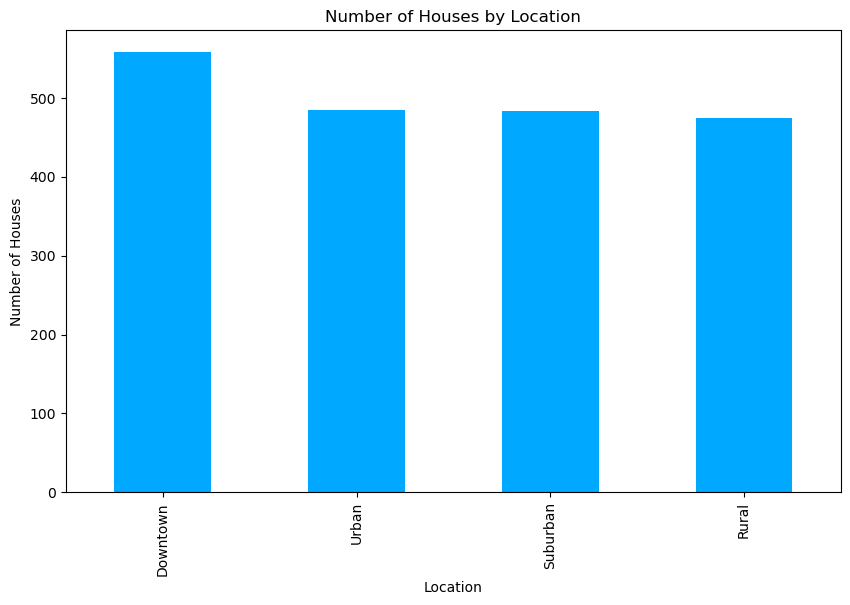

In [42]:
# plot as a bar chart number of houses by location?

# Count the number of houses for each location
houses_by_location = df['Location'].value_counts()

# Plot the result as a bar chart
plt.figure(figsize=(10, 6))
houses_by_location.plot(kind='bar', color='#00a8ff')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.title('Number of Houses by Location')




In [44]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Location' column
df['Location'] = label_encoder.fit_transform(df['Location'])

# Apply LabelEncoder to the 'Condition' column
df['Condition'] = label_encoder.fit_transform(df['Condition'])

df['Garage'] = label_encoder.fit_transform(df['Garage'])

df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [ ]:
# Is there a correlation between condition and Price? 

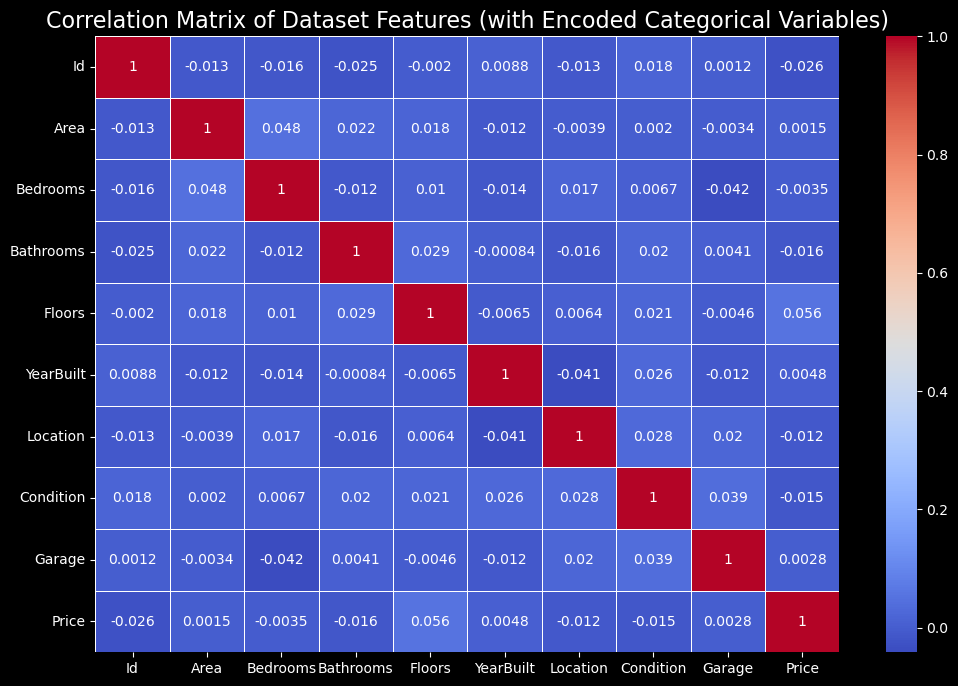

In [98]:
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix of Dataset Features (with Encoded Categorical Variables)', fontsize=16)

# Show the plot
plt.show()




In [46]:
# What is the % price difference between the largest house and the smallest by area? 

# Find the house with the largest area
largest_house = df[df['Area'] == df['Area'].max()]

# Find the house with the smallest area
smallest_house = df[df['Area'] == df['Area'].min()]

# Get the prices of the largest and smallest houses
largest_price = largest_house['Price'].values[0]
smallest_price = smallest_house['Price'].values[0]

# Calculate the percentage price difference
price_difference_percentage = (((largest_price - smallest_price) / smallest_price) * 100).round(2)

price_difference_percentage


-53.97

In [48]:
# On average what is the price per sq ft?

# Calculate the price per square foot for each house
df['Price_per_sq_ft'] = df['Price'] / df['Area']

# Calculate the average price per square foot
average_price_per_sq_ft = int(df['Price_per_sq_ft'].mean())


average_price_per_sq_ft

270

In [50]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price', 'Price_per_sq_ft'],
      dtype='object')

In [52]:
# Correctly drop columns
X = df.drop(columns=['Bedrooms', 'Bathrooms', 'Location', 'Condition', 'Garage', 'Price'])

# Define the dependent variable y (Price)
y = df['Price']


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = .2)

In [56]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [58]:
model.score(X_test,y_test)

0.4491325894797846